In [119]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

import pandas as pd
import matplotlib.pyplot as plt

boston = load_boston()


In [137]:
x_feat = boston['data']
y_target = boston['target']
# sc = StandardScaler()
sc = StandardScaler()
sc2 = StandardScaler()
x_feat = sc.fit_transform(x_feat)
y_target = boston['target'].reshape(-1, 1)
y_target = t_scaler.fit_transform(y_target)

print(x_feat.shape, y_target.shape)
x_train, x_test, y_train, y_test = train_test_split(x_feat, y_target, test_size = 0.2)
print(x_train.shape, y_train.shape)

xInput = Input(batch_shape=(None, x_train.shape[1]))
hLayer = Dense(10,activation='relu')(xInput)
yOutput = Dense(y_train.shape[1])(hLayer)
model = Model(xInput, yOutput)
# model.compile(loss='mean_squared_error', optimizer = 'adam')
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate=0.005))
hist = model.fit(x_train, y_train, epochs=100, batch_size = 10, validation_data=(x_test, y_test))

(506, 13) (506, 1)
(404, 13) (404, 1)
Epoch 1/100
41/41 [==============================] - 0s 2ms/step - loss: 0.7272 - val_loss: 0.4182
Epoch 2/100
41/41 [==============================] - 0s 1ms/step - loss: 0.3000 - val_loss: 0.2885
Epoch 3/100
41/41 [==============================] - 0s 950us/step - loss: 0.2203 - val_loss: 0.2564
Epoch 4/100
41/41 [==============================] - 0s 900us/step - loss: 0.1847 - val_loss: 0.2393
Epoch 5/100
41/41 [==============================] - 0s 1ms/step - loss: 0.1663 - val_loss: 0.2156
Epoch 6/100
41/41 [==============================] - 0s 925us/step - loss: 0.1565 - val_loss: 0.2231
Epoch 7/100
41/41 [==============================] - 0s 1ms/step - loss: 0.1471 - val_loss: 0.2007
Epoch 8/100
41/41 [==============================] - 0s 1ms/step - loss: 0.1408 - val_loss: 0.2409
Epoch 9/100
41/41 [==============================] - 0s 950us/step - loss: 0.1377 - val_loss: 0.2137
Epoch 10/100
41/41 [==============================] - 0s 1ms/st

41/41 [==============================] - 0s 950us/step - loss: 0.0776 - val_loss: 0.1853
Epoch 82/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0800 - val_loss: 0.1905
Epoch 83/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0802 - val_loss: 0.1992
Epoch 84/100
41/41 [==============================] - 0s 975us/step - loss: 0.0753 - val_loss: 0.1842
Epoch 85/100
41/41 [==============================] - 0s 975us/step - loss: 0.0779 - val_loss: 0.2148
Epoch 86/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0823 - val_loss: 0.1807
Epoch 87/100
41/41 [==============================] - 0s 1ms/step - loss: 0.0759 - val_loss: 0.1865
Epoch 88/100
41/41 [==============================] - 0s 925us/step - loss: 0.0781 - val_loss: 0.1896
Epoch 89/100
41/41 [==============================] - 0s 975us/step - loss: 0.0799 - val_loss: 0.1906
Epoch 90/100
41/41 [==============================] - 0s 950us/step - loss: 0.0763 - val_loss: 0.1993
E

In [138]:
#평가

y_pred = model.predict(x_test)
R2 = r2_score(y_test, y_pred)

print(R2)

0.8504923024229443


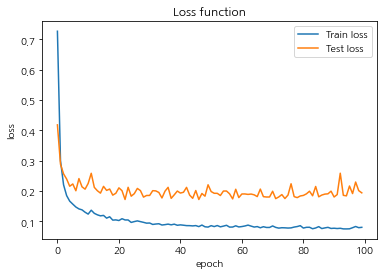

In [139]:
# error가 감소하는 모습을 관찰한다.
plt.plot(hist.history['loss'], label='Train loss')
plt.plot(hist.history['val_loss'], label='Test loss')
plt.legend()
plt.title("Loss function")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

Model: "model_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 13)]              0         
                                                                 
 Hidden-1 (Dense)            (None, 100)               1400      
                                                                 
 Hidden-2 (Dense)            (None, 100)               10100     
                                                                 
 Hidden-3 (Dense)            (None, 100)               10100     
                                                                 
 Hidden-4 (Dense)            (None, 100)               10100     
                                                                 
 Hidden-5 (Dense)            (None, 100)               10100     
                                                                 
 Output (Dense)              (None, 1)                 101

21/21 [==============================] - 0s 2ms/step - loss: 0.0366 - val_loss: 0.1154
Epoch 70/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0371 - val_loss: 0.1133
Epoch 71/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0360 - val_loss: 0.1171
Epoch 72/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0349 - val_loss: 0.1150
Epoch 73/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0348 - val_loss: 0.1174
Epoch 74/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0350 - val_loss: 0.1152
Epoch 75/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0348 - val_loss: 0.1173
Epoch 76/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0352 - val_loss: 0.1127
Epoch 77/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0331 - val_loss: 0.1168
Epoch 78/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0322 - val_loss: 0.1170
Epoch 79/100


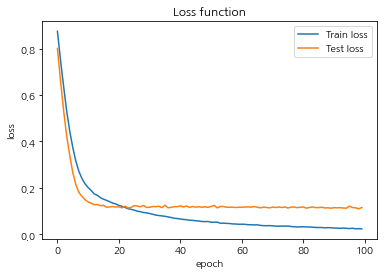

시험 데이터의 R-score = 0.887


0.8873706408530226

In [127]:
#정리

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# boston house price 데이터를 가져온다.
boston = load_boston()

x_feat = boston['data']
y_target = boston['target'].reshape(-1, 1)

# 데이터 표준화
f_scaler = StandardScaler()
t_scaler = StandardScaler()

xs_feat = f_scaler.fit_transform(x_feat)
ys_target = t_scaler.fit_transform(y_target)

# 학습 데이터와 시험 데이터를 생성한다.
x_train, x_test, y_train, y_test = train_test_split(xs_feat, ys_target, test_size=0.2)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

# 그래프 모델을 생성한다
n_hLayer = 5
n_hNeuron = 100
xInput = Input(batch_shape=(None, x_train.shape[1]), name='Input')
xLayer = Dense(n_hNeuron, activation='relu', name='Hidden-1')(xInput)

for i in range(n_hLayer - 1):
    xLayer = Dense(n_hNeuron, activation='relu', 
                   name='Hidden-' + str(i+2))(xLayer)

yOutput = Dense(y_train.shape[1],name='Output')(xLayer)
model = Model(xInput, yOutput)
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.0001))
model.summary()

# 학습한다.
hist = model.fit(x_train, y_train, batch_size=20, epochs=100, 
                 validation_data =(x_test, y_test))

# error가 감소하는 모습을 관찰한다.
plt.plot(hist.history['loss'], label='Train loss')
plt.plot(hist.history['val_loss'], label='Test loss')
plt.legend()
plt.title("Loss function")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

# 학습이 완료되면 x_test를 넣어서 출력값을 확인한다.
y_pred = model.predict(x_test)

# y_test와 y_pred로 R2 score를 계산한다.
r2 = r2_score(y_test, y_pred)
print('시험 데이터의 R-score = {:.3f}'.format(r2))

import pandas as pd

# 데이터 복원
y_test_org = t_scaler.inverse_transform(y_test)
y_pred_org = t_scaler.inverse_transform(y_pred)

# 육안으로 추정결과 비교
df = pd.DataFrame({'y_test': y_test_org.reshape(-1,), 'y_pred': y_pred_org.reshape(-1,)})
df.head(20)

r2_score(y_test_org, y_pred_org)
